In [32]:
# Import necessary libraries
import pandas as pd
import requests
import json
import influxdb_client
from influxdb import InfluxDBClient
from influxdb_client.client.write_api import SYNCHRONOUS
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#AUTOMATION AREA
# 1) Get company tickers to format URL string
# 2) Format string as such: "https://financialmodelingprep.com/api/v3/income-statement/" + companyName + "?datatype=csv&apikey=" + API_KEY

In [3]:
# Retrieve local API key from file (---this file is not to be pushed to GitHub for security reasons ---)
keyFile="/home/wintergreen/Projects/fskeyfile.txt"
with open(keyFile) as f:
    key = str(f.readline().replace("\n",""))

In [4]:
API_KEY = key

In [5]:
TICKER_TARGET = "AAPL"

In [6]:
URL = "https://financialmodelingprep.com/api/v3/income-statement/" + TICKER_TARGET + "?limit=120&apikey=" + API_KEY

In [7]:
r = requests.get(URL)

In [8]:
r = r.json()

In [24]:
data = pd.DataFrame.from_dict(r)
data = data[['date','revenue']]
data = data.sort_values(by=['date'])
data = data.reset_index()
data = data[['date','revenue']]
data

,date,revenue
0,1985-09-30,1918300000
1,1986-09-30,1901900000
2,1987-09-30,2661100000
3,1988-09-30,4071400000
4,1989-09-30,5284000000
5,1990-09-30,5558400000
6,1991-09-30,6308800000
7,1992-09-30,7086500000
8,1993-09-30,7977000000
9,1994-09-30,9188748000


<AxesSubplot:xlabel='Time-35yrs', ylabel='Billions-USD'>

<Figure size 432x288 with 0 Axes>

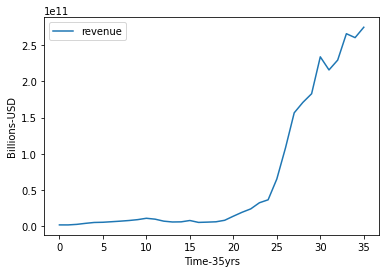

In [37]:
plt.figure()
ax = data.plot()
ax.set_ylabel('Billions-USD')
ax.set_xlabel('Time-35yrs')
ax

### NEXT STEPS:

At this point, the program can successfully write out data to the InfluxDB database. The next steps will be:

1) Replace the above code with Python code that can write in bulk to the InfluxDB bucket
        
2) Connect the InfluxDB bucket to a Grafana Data Source and create a Dashboard that features this bucket as a DataSource

Once the above two are done, we can then move onto actually plugging data into the InfluxDB.

3) Run calculations on financial data imported into InfluxDB

4) Visualize in Grafana